## **Detection of Obesity Among the Population**
Group Members: Aditya Jain, Ahmed Omar, Divine Ahuchogu, Yedu Krishnan 

---

## Introduction

**Today, many people around the world struggle with obesity, along with the complications that may arise with a higher body weight. Studies have shown that obesity increases the risk of several debilitating and deadly diseases, including diabetes, heart disease, and some cancers [2]. Over the years, obesity levels have been increasing. In fact, based on data from 1975 till now, the levels have tripled [3]. Our question is: what is the reason for such a difference in the increasing obesity levels in just few decades? According to the World Health Organization(WHO), obesity is estimated to be a contributing factor in approximately 44% of the global burden of type 2 diabetes, 23% of ischemic heart disease burden, and 7-41% of certain cancer burdens [3]. Our goal is to find out how factors like age, gender, height, and weight is correlated with  the obesity levels in people. Our main objective is to use our acquired knowledge from the dataset found to predict the levels of obesity in people based on their lifestyle choices.**

## Dataset

**The dataset we chose has been obtained from the UC Irvine Machine Learning Repository,
with 2111 rows and 17 columns [1]. Furthermore, the dataset focuses on the estimation of obesity
levels from three countries, including Mexico, Peru, and Colombia and is based on their physical
health as well as their eating habits. The variables include:**

1) Gender
2) Age
3) Height
4) Weight
5) family_history_with_overweight
6) FAVC (Do you eat high caloric food frequently?)
7) FCVC (Do you usually eat vegetables in your meals?)
8) NCP (How many main meals do you have daily?)
9) CAEC (Do you eat any food between meals?)
10) SMOKE (Do you smoke?)
11) CH2O (how much water do you drink daily?)
12) SCC (Do you monitor the calories you eat daily?)
13) FAF (How often do you have physical activity?)
14) TUE (How much time do you use technology like phones, videogames, etc.)
15) CALC (How often do you drink alcohol?)
16) MTRANS (Which transportation do you usually use?
17) NObeyesdad (Obesity level)

## Data Cleaning

---

**Most of the data was somewhat clean, but the inclusion of multiple categorical variables required us to convert these columns into dummy variables to ensure numerical values were used for the logistic regression analysis. All columns were therefore converted into integers/dummies. Columns were renamed below to simplify what each column is meant to represent. Lastly, we converted the outcome(obesity) into two number of classes to simplify the analysis instead of having 7 different classes. Outcome 0 included the classes 'Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_I', 'Overweight_Level_II' whereas outcome 1 (obesity) was composed of 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'. Therefore, class sizes for the outcome 0 and 1 group were 1,139 and 972 respectively.**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import statsmodels.api as sm


In [2]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
data['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [4]:
# Categorize 'NObeyesdad' as either 1 for "obese/overweight" or 0 for "normal"
data['NObeyesdad'] = data['NObeyesdad'].apply(lambda x: 0 if x in ['Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_I', 'Overweight_Level_II'] else 1)

# Verify the changes by displaying the unique values of the modified 'NObeyesdad' column
data['NObeyesdad'].unique(), data.head()

(array([0, 1]),
    Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
 0  Female  21.0    1.62    64.0                            yes   no   2.0   
 1  Female  21.0    1.52    56.0                            yes   no   3.0   
 2    Male  23.0    1.80    77.0                            yes   no   2.0   
 3    Male  27.0    1.80    87.0                             no   no   3.0   
 4    Male  22.0    1.78    89.8                             no   no   2.0   
 
    NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
 0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
 1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
 2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
 3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
 4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
 
                   MTRANS  NObeyesdad  
 0  Public_Transportation           0  
 1  Public_Transportation           0  
 2  Public_Transportation 

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
dummy_variable = LabelEncoder()

# Define categorical columns excluding 'NObeyesdad'
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = dummy_variable.fit_transform(data[col])
 

In [6]:
# Convert the Age column to int
data['Age'] = data['Age'].astype(int)
data['FCVC'] = data['FCVC'].astype(int)
data['NCP'] = data['NCP'].astype(int)
data['CH2O'] = data['CH2O'].astype(int)
data['FAF'] = data['FAF'].astype(int)
data['TUE'] = data['TUE'].astype(int)
data['CAEC'] = data['CAEC'].astype(int)

data.head(), data.dtypes


(   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
 0       0   21    1.62    64.0                               1     0     2   
 1       0   21    1.52    56.0                               1     0     3   
 2       1   23    1.80    77.0                               1     0     2   
 3       1   27    1.80    87.0                               0     0     3   
 4       1   22    1.78    89.8                               0     0     2   
 
    NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
 0    3     2      0     2    0    0    1     3       3           0  
 1    3     2      1     3    1    3    0     2       3           0  
 2    3     2      0     2    0    2    1     1       3           0  
 3    3     2      0     2    0    2    0     1       4           0  
 4    1     2      0     2    0    0    0     2       3           0  ,
 Gender                              int64
 Age                                 int64
 Height          

In [7]:
# Save the modified dataset to a new CSV file
# newfile = 'Obesity_Dataset.csv'
# data.to_csv(newfile, index=False)

# Return the path of the new file for download
# newfile


In [8]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
# Number of classes and size

num_classes = len(data['NObeyesdad'].unique())
class_sizes = data['NObeyesdad'].value_counts()

In [10]:
# Number of Classes
num_classes

2

In [11]:
# Size of Classes 
class_sizes

0    1139
1     972
Name: NObeyesdad, dtype: int64

In [12]:
data = data.rename(columns={"FAVC": "High_Calorie", 
                        "FCVC": "Vegetables", 
                        "NCP" :"Number_of_meals", 
                        "SMOKE" :"Smoke", 
                        "CH2O":"Water_consumption", 
                        "CALC":"Alcohol_consumption",
                        "MTRANS": "Transportation_method",
                        "FAF": "Physical_Acitivity",
                        "TUE": "Time_on_Technology",
                        "SCC": "Calorie_Monitoring",
                        "NObeyesdad": "Outcome",
                        "CAEC": "Food_Between_Meals"})
                        
data

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Food_Between_Meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
0,0,21,1.620000,64.000000,1,0,2,3,2,0,2,0,0,1,3,3,0
1,0,21,1.520000,56.000000,1,0,3,3,2,1,3,1,3,0,2,3,0
2,1,23,1.800000,77.000000,1,0,2,3,2,0,2,0,2,1,1,3,0
3,1,27,1.800000,87.000000,0,0,3,3,2,0,2,0,2,0,1,4,0
4,1,22,1.780000,89.800000,0,0,2,1,2,0,2,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,2,0,1,0,1,0,2,3,1
2107,0,21,1.748584,133.742943,1,1,3,3,2,0,2,0,1,0,2,3,1
2108,0,22,1.752206,133.689352,1,1,3,3,2,0,2,0,1,0,2,3,1
2109,0,24,1.739450,133.346641,1,1,3,3,2,0,2,0,1,0,2,3,1


## Exploratory Data Analysis For Numeric Variables
---

**To get a better sense of the data, simple visual analysis was conducted for the numerical variables which include Age, Height, and Weight. For the first visual, a correlation matrix was produced to look at the relationship between all the variables in the dataset. To follow, histograms were able to provide a better outline on the distribution of the variables for both outcome groups when it came to the numerical variables. Box plots were then created to get a better visual on the interquartile range and median for the two outcome groups. Since visuals are not enough to form a solid conclusion, t-test analysis was conducted to see whether there was a statistically significant difference between the two means for both groups for Age, Height, and Weight. This required bootstrapping to meet the assumption of normality for the t-test difference in means analysis.**

In [13]:
# Describe basic statistics of the data
stats = data[['Age', 'Height', 'Weight']].describe()
stats

,Age,Height,Weight
count,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701677,86.586058
std,6.308664,0.093305,26.191172
min,14.000000,1.450000,39.000000
25%,19.000000,1.630000,65.473343
50%,22.000000,1.700499,83.000000
75%,26.000000,1.768464,107.430682
max,61.000000,1.980000,173.000000


### Correlation Between Variables


In [14]:
# Create a correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Food_Between_Meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
Gender,1.000000,0.050677,0.618466,0.161668,0.102512,0.064934,-0.317272,0.023921,0.091543,0.044698,0.194832,-0.102633,0.174468,0.071148,0.007616,-0.137537,-0.001436
Age,0.050677,1.000000,-0.030738,0.190263,0.195552,0.055872,-0.013240,-0.070632,0.074851,0.097897,-0.090672,-0.111882,-0.163307,-0.234951,-0.043344,-0.601020,0.205189
Height,0.618466,-0.030738,1.000000,0.463136,0.247684,0.178364,-0.070032,0.214633,0.048818,0.055499,0.191061,-0.133753,0.234248,-0.006181,-0.129732,-0.073609,0.137413
Weight,0.161668,0.190263,0.463136,1.000000,0.496820,0.272300,0.201087,0.126058,0.287493,0.025746,0.052705,-0.201906,-0.158726,-0.274960,-0.206677,0.004610,0.793652
family_history_with_overweight,0.102512,0.195552,0.247684,0.496820,1.000000,0.208036,0.008332,0.052504,0.169787,0.017385,0.053889,-0.185422,-0.128375,-0.097283,0.036676,-0.101540,0.416607
High_Calorie,0.064934,0.055872,0.178364,0.272300,0.208036,1.000000,-0.073482,-0.019162,0.150068,-0.050660,-0.082638,-0.190658,-0.156302,-0.054783,-0.089520,-0.069800,0.278355
Vegetables,-0.317272,-0.013240,-0.070032,0.201087,0.008332,-0.073482,1.000000,0.138510,-0.100727,0.025567,0.037495,0.070328,0.019344,-0.150120,-0.085690,0.105084,0.136075
Number_of_meals,0.023921,-0.070632,0.214633,0.126058,0.052504,-0.019162,0.138510,1.000000,-0.122478,0.035825,0.067431,-0.006166,0.126888,0.028048,-0.116039,-0.012480,0.056340
Food_Between_Meals,0.091543,0.074851,0.048818,0.287493,0.169787,0.150068,-0.100727,-0.122478,1.000000,-0.055282,0.048315,-0.109179,-0.098121,-0.157565,-0.047540,-0.048535,0.232819
Smoke,0.044698,0.097897,0.055499,0.025746,0.017385,-0.050660,0.025567,0.035825,-0.055282,1.000000,0.014689,0.047731,0.022590,0.063889,-0.082471,-0.010702,0.011578


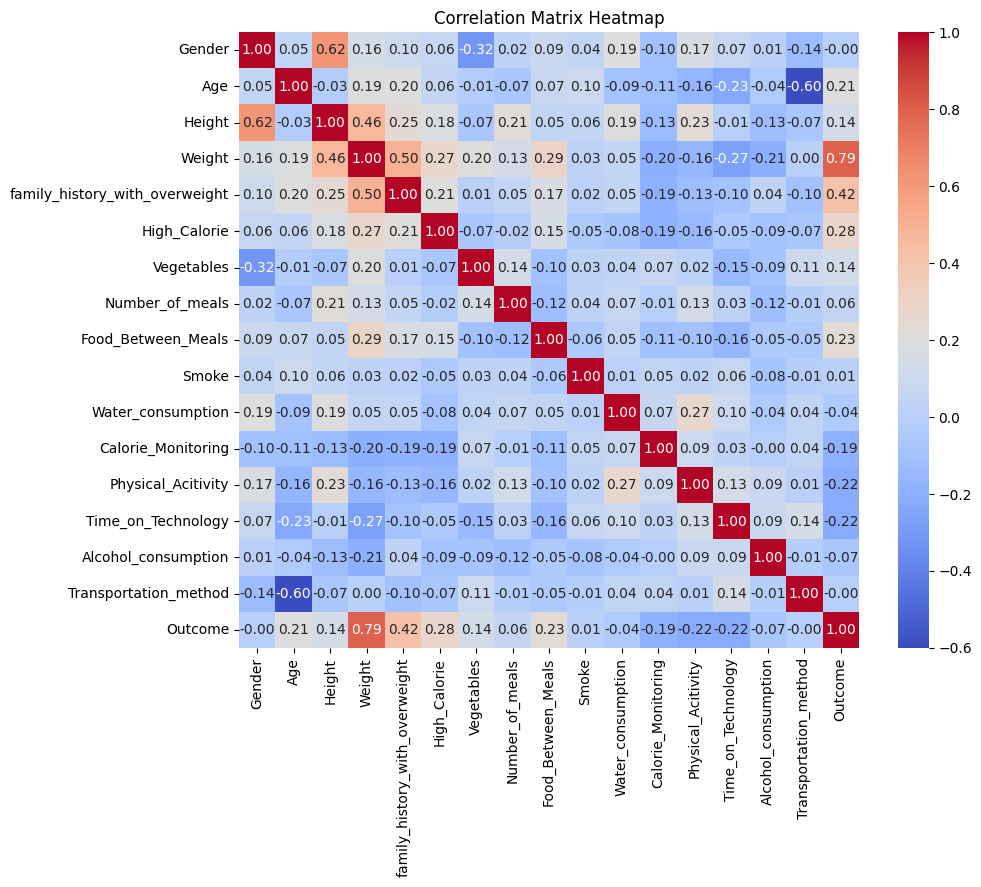

In [15]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

**The above correlation matrix opens up a wide opportunity to correlate all attributes of the dataset. The main insights are the strong positive correlation between Outcome and Weight, and strong negative correlation between Age and Transportation method which have a correlation coefficient of 0.79 and -0.60 respectively. The correlation between Weight and Height as well as Weight and Family history with Overweight are also strong with a correlation coefficient of 0.46 and 0.50 respectively.**

#### Histogram

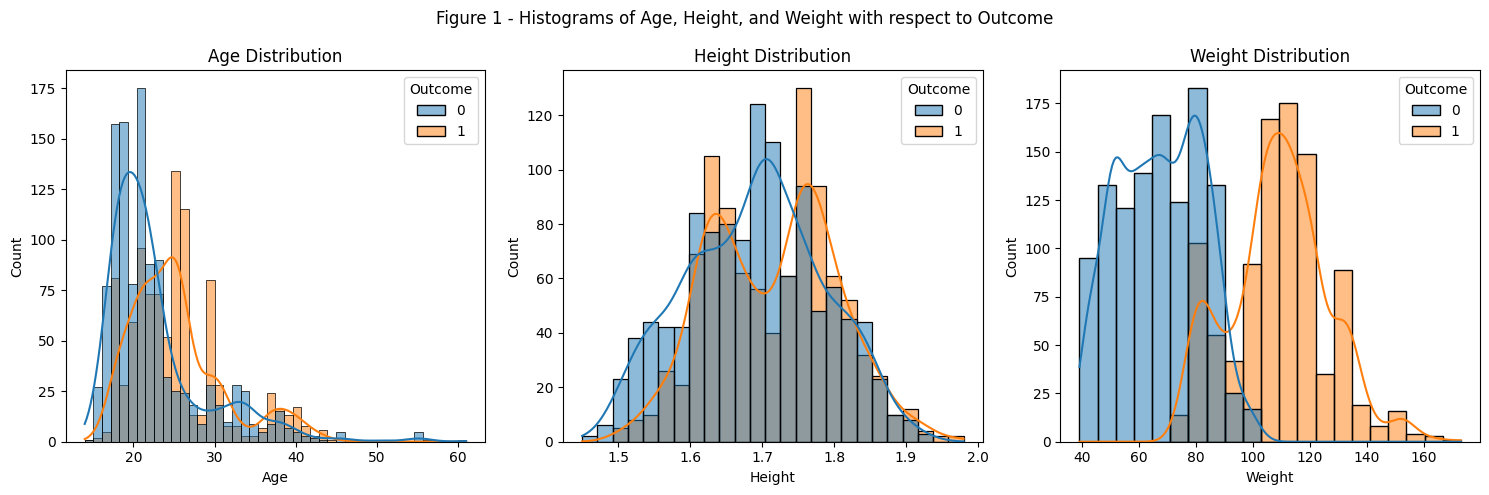

In [16]:
# Create subplots 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create Histograms
sns.histplot(data=data, x='Age', hue='Outcome', ax=axes[0], kde=True)
sns.histplot(data=data, x='Height', hue='Outcome', ax=axes[1], kde=True)
sns.histplot(data=data, x='Weight', hue='Outcome', ax=axes[2], kde=True)

# Set titles
axes[0].set_title('Age Distribution')
axes[1].set_title('Height Distribution')
axes[2].set_title('Weight Distribution')

# Addtitle
plt.suptitle('Figure 1 - Histograms of Age, Height, and Weight with respect to Outcome')
plt.tight_layout()
plt.show()


**The histograms above display the distribution of Age, Height, and Weight for two different outcomes (0 and 1). Outcome 1 is generally associated with younger people who are taller and heavier, while Outcome 0 has a more diverse age distribution with a tendency towards lighter and shorter people. Both height distributions are normally distributed, whereas age and weight are right-skewed for Outcome 1, indicating a younger and heavier subset of the population in that category.**

### Boxplots

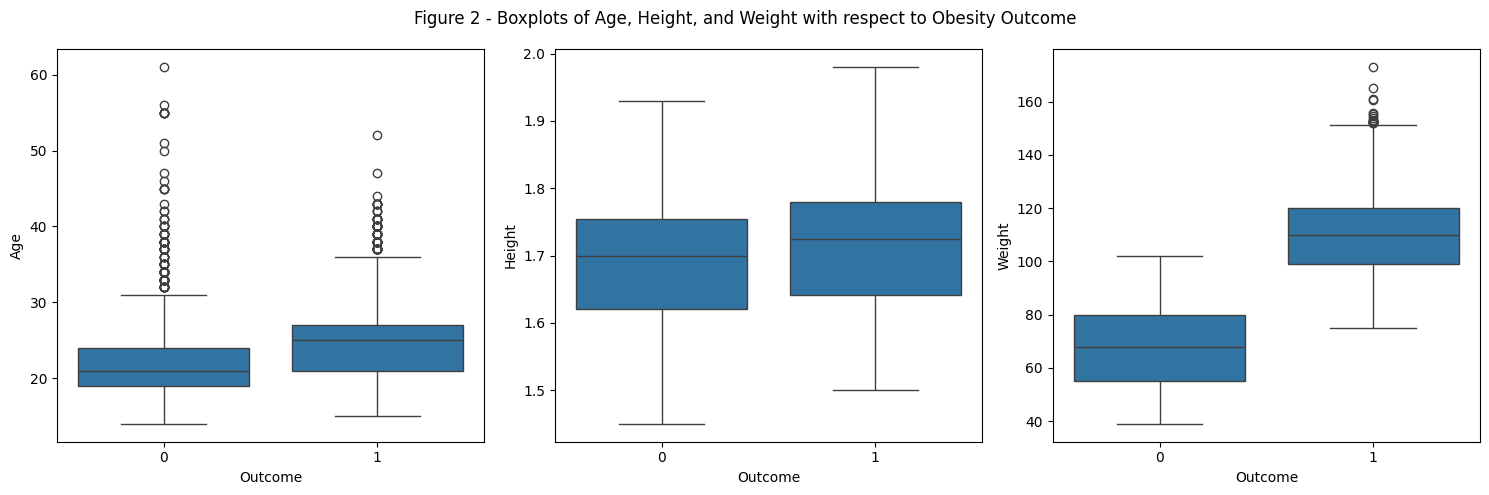

In [17]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create boxplots
sns.boxplot(x='Outcome', y='Age', data=data, ax=axes[0])
sns.boxplot(x='Outcome', y='Height', data=data, ax=axes[1])
sns.boxplot(x='Outcome', y='Weight', data=data, ax=axes[2])

# Add title 
plt.suptitle('Figure 2 - Boxplots of Age, Height, and Weight with respect to Obesity Outcome')

# Show plot
plt.tight_layout()
plt.show()

**The boxplots compare Age, Height, and Weight distributions across two outcomes related to obesity.** 

- **Age**: For Outcome 0, the median age is lower, and the age range is narrower compared to Outcome 1. There are also several outliers indicating people older than the typical range for Outcome 0.
  
- **Height**: Both outcomes have similar medians and interquartile ranges for height, suggesting height may not be significantly different between the two groups.

- **Weight**: There is a noticeable difference in weight between the two outcomes. Outcome 1 has a higher median weight and a larger interquartile range, indicating that people with this outcome tend to be heavier.

**In general, these boxplots suggest that people with Outcome 1 are generally older and heavier, which could imply a higher risk or prevalence of obesity, while height appears to be consistent across both outcomes. Just from the visuals, assumptions cannot be made and therefore t-test analysis was performed to see if a significant difference exists for each variables between the two groups.**

### T-test Analysis


**H0:  The difference between the two means for each variable's outcome group is equal to 0**

**HA: The difference between the two means for each variable's outcome group is NOT equal to 0**


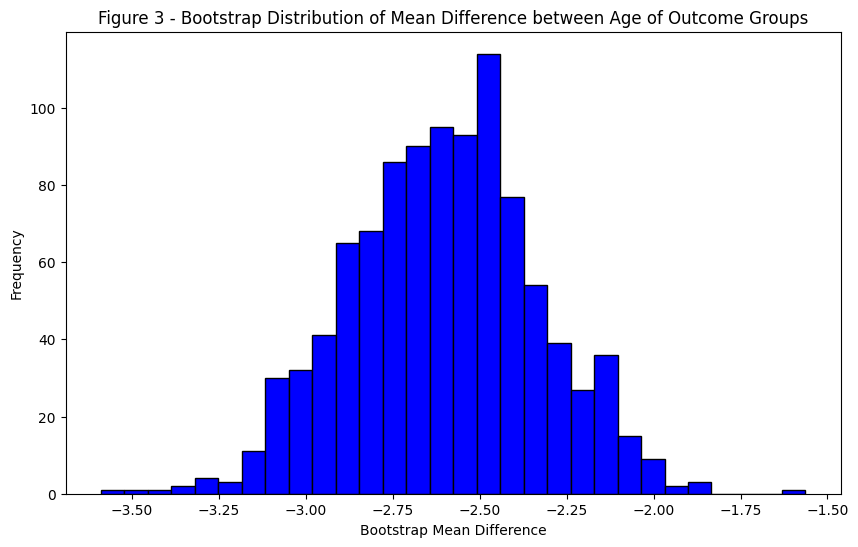

In [18]:
# Bootstrapping
outcome_0_age = data[data['Outcome'] == 0]['Age']
outcome_1_age = data[data['Outcome'] == 1]['Age']
n_outcome_0_age = data[data['Outcome'] == 0]['Age'].count()
n_outcome_1_age = data[data['Outcome'] == 1]['Age'].count()

# Number of simulations
nsims = 1000

# Generate bootstrap samples and calculate the mean difference
bootstrap_mean_difference = np.zeros(nsims)
for i in range(nsims):
    sample_0_age = np.random.choice(outcome_0_age, size = n_outcome_0_age, replace=True)
    sample_1_age = np.random.choice(outcome_1_age, size = n_outcome_1_age, replace=True)
    bootstrap_mean_difference[i] = np.mean(sample_0_age) - np.mean(sample_1_age)

# Plot bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_mean_difference, bins=30, color='blue', edgecolor='black')
plt.xlabel('Bootstrap Mean Difference')
plt.ylabel('Frequency')
plt.title('Figure 3 - Bootstrap Distribution of Mean Difference between Age of Outcome Groups')
plt.show()


In [19]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(outcome_0_age, outcome_1_age, equal_var=False) 

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level ({}).".format(alpha))
    print("We reject the null hypothesis.")
    print("There is a statistically significant difference in the mean age between the two outcome groups.")
else:
    print("The p-value is greater than or equal to the significance level ({}).".format(alpha))
    print("We fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude a statistically significant difference in the mean age between the two outcome groups.")


t-statistic: -9.691464196822928
p-value: 9.30274829436022e-22
The p-value is less than the significance level (0.05).
We reject the null hypothesis.
There is a statistically significant difference in the mean age between the two outcome groups.


**The t-statistic of -9.69 and the tiny p-value (9.30e-22) show a big difference in average ages between the two groups. Since the p-value is way below 0.05, we're confident in rejecting the null hypothesis. This means there's a significant age gap between the outcome groups, a key finding in our project.**

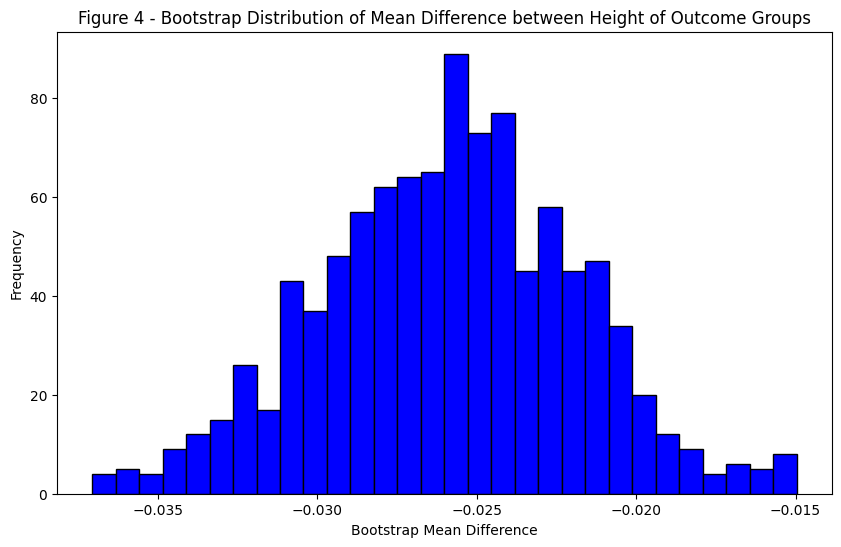

In [20]:
# Extract data for each outcome group
outcome_0_height = data[data['Outcome'] == 0]['Height']
outcome_1_height = data[data['Outcome'] == 1]['Height']
n_outcome_0_height = data[data['Outcome'] == 0]['Height'].count()
n_outcome_1_height = data[data['Outcome'] == 1]['Height'].count()

# Number of simulations
nsims = 1000

# Generate bootstrap samples and calculate the mean difference
bootstrap_mean_difference = np.zeros(nsims)
for i in range(nsims):
    sample_0_height = np.random.choice(outcome_0_height, size = n_outcome_0_height, replace=True)
    sample_1_height = np.random.choice(outcome_1_height, size = n_outcome_1_height, replace=True)
    bootstrap_mean_difference[i] = np.mean(sample_0_height) - np.mean(sample_1_height)

# Plot bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_mean_difference, bins=30, color='blue', edgecolor='black')
plt.xlabel('Bootstrap Mean Difference')
plt.ylabel('Frequency')
plt.title('Figure 4 - Bootstrap Distribution of Mean Difference between Height of Outcome Groups')
plt.show()


In [21]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(outcome_0_height, outcome_1_height, equal_var=False) 

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level ({}).".format(alpha))
    print("We reject the null hypothesis.")
    print("There is a statistically significant difference in the mean height between the two outcome groups.")
else:
    print("The p-value is greater than or equal to the significance level ({}).".format(alpha))
    print("We fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude a statistically significant difference in the mean height between the two outcome groups.")


t-statistic: -6.405435192046915
p-value: 1.8464734842511456e-10
The p-value is less than the significance level (0.05).
We reject the null hypothesis.
There is a statistically significant difference in the mean height between the two outcome groups.


**With a t-statistic of -6.41 and a p-value of 1.85e-10, we observe a substantial difference in average heights between the two groups. Since the p-value is much lower than the standard threshold of 0.05, we confidently reject the null hypothesis. This indicates a statistically significant contrast in height distribution among the outcome groups, emphasizing a noteworthy finding in our project analysis.**

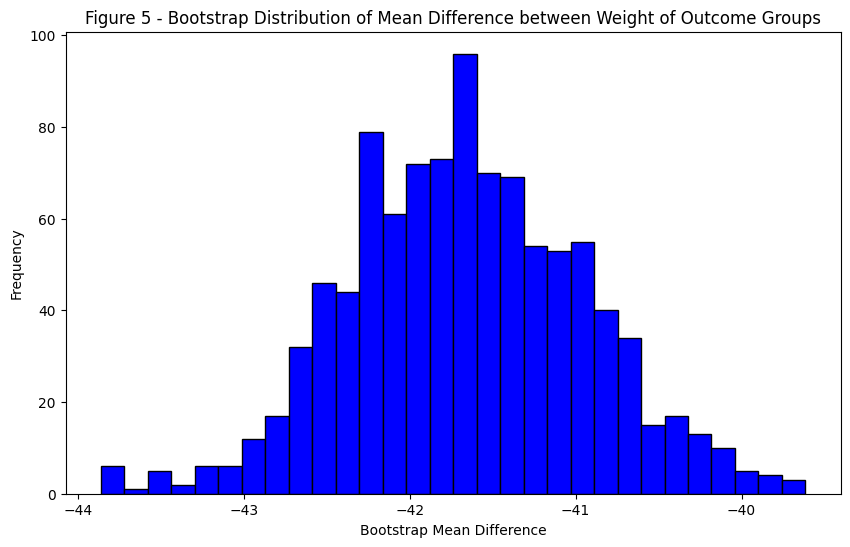

In [22]:
# Extract data for each outcome group
outcome_0_weight = data[data['Outcome'] == 0]['Weight']
outcome_1_weight = data[data['Outcome'] == 1]['Weight']
n_outcome_0_weight = data[data['Outcome'] == 0]['Weight'].count()
n_outcome_1_weight = data[data['Outcome'] == 1]['Height'].count()

# Number of simulations
nsims = 1000

# Generate bootstrap samples and calculate the mean difference
bootstrap_mean_difference = np.zeros(nsims)
for i in range(nsims):
    sample_0_weight = np.random.choice(outcome_0_weight, size = n_outcome_0_weight, replace=True)
    sample_1_weight = np.random.choice(outcome_1_weight, size = n_outcome_1_weight, replace=True)
    bootstrap_mean_difference[i] = np.mean(sample_0_weight) - np.mean(sample_1_weight)

# Plot bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_mean_difference, bins=30, color='blue', edgecolor='black')
plt.xlabel('Bootstrap Mean Difference')
plt.ylabel('Frequency')
plt.title('Figure 5 - Bootstrap Distribution of Mean Difference between Weight of Outcome Groups')
plt.show()


In [23]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(outcome_0_weight, outcome_1_weight, equal_var=False) 

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level ({}).".format(alpha))
    print("We reject the null hypothesis.")
    print("There is a statistically significant difference in the mean weight between the two outcome groups.")
else:
    print("The p-value is greater than or equal to the significance level ({}).".format(alpha))
    print("We fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude a statistically significant difference in the mean weight between the two outcome groups.")


t-statistic: -59.109812874108115
p-value: 0.0
The p-value is less than the significance level (0.05).
We reject the null hypothesis.
There is a statistically significant difference in the mean weight between the two outcome groups.


**The t-statistic of -59.11 coupled with a p-value of 0.0 reveals an immense contrast in average weights between the two groups. Given the p-value's insignificance below the customary threshold of 0.05, we confidently reject the null hypothesis. This solidifies the presence of a statistically significant divergence in weight distribution among the outcome groups, marking a crucial insight in our project's findings.**

## Principal Commponent Analysis (PCA) 

---

In [24]:
data_copy = data.copy()
data_copy

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Food_Between_Meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
0,0,21,1.620000,64.000000,1,0,2,3,2,0,2,0,0,1,3,3,0
1,0,21,1.520000,56.000000,1,0,3,3,2,1,3,1,3,0,2,3,0
2,1,23,1.800000,77.000000,1,0,2,3,2,0,2,0,2,1,1,3,0
3,1,27,1.800000,87.000000,0,0,3,3,2,0,2,0,2,0,1,4,0
4,1,22,1.780000,89.800000,0,0,2,1,2,0,2,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,2,0,1,0,1,0,2,3,1
2107,0,21,1.748584,133.742943,1,1,3,3,2,0,2,0,1,0,2,3,1
2108,0,22,1.752206,133.689352,1,1,3,3,2,0,2,0,1,0,2,3,1
2109,0,24,1.739450,133.346641,1,1,3,3,2,0,2,0,1,0,2,3,1


In [25]:
#saving diagnosis data
outcomedata = data["Outcome"]
outcomedata

0       0
1       0
2       0
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: Outcome, Length: 2111, dtype: int64

In [26]:
# Standardarize/normalize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_copy)
selected_data_standardized = pd.DataFrame(data_copy)
selected_data_standardized

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Food_Between_Meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
0,0,21,1.620000,64.000000,1,0,2,3,2,0,2,0,0,1,3,3,0
1,0,21,1.520000,56.000000,1,0,3,3,2,1,3,1,3,0,2,3,0
2,1,23,1.800000,77.000000,1,0,2,3,2,0,2,0,2,1,1,3,0
3,1,27,1.800000,87.000000,0,0,3,3,2,0,2,0,2,0,1,4,0
4,1,22,1.780000,89.800000,0,0,2,1,2,0,2,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,2,0,1,0,1,0,2,3,1
2107,0,21,1.748584,133.742943,1,1,3,3,2,0,2,0,1,0,2,3,1
2108,0,22,1.752206,133.689352,1,1,3,3,2,0,2,0,1,0,2,3,1
2109,0,24,1.739450,133.346641,1,1,3,3,2,0,2,0,1,0,2,3,1


In [27]:
pca = PCA()
data_pca = pca.fit_transform(selected_data_standardized)
df_pca = pd.DataFrame(data_pca)
pca_columns = ['PC' + str(i) for i in range(1, len(df_pca.columns) + 1)]
df_pca.columns = pca_columns
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-22.709820,-1.939526,0.495874,-0.022072,-0.703023,0.510098,0.378575,0.490067,-0.797356,-0.376037,0.069622,0.251601,0.851246,0.114182,-0.166648,-0.011428,0.016304
1,-30.699533,-1.605241,-0.415082,2.257081,0.765597,-1.227531,0.726818,-0.576931,-0.162361,-0.492708,0.222395,-0.146497,0.667976,0.542222,0.809193,0.892627,-0.115483
2,-9.629767,-0.621617,-0.130150,1.487604,0.476610,0.481650,0.224382,-0.342200,1.206393,-0.183944,-0.260577,-0.108071,0.827981,0.473206,-0.165085,-0.098948,0.039065
3,0.553425,2.734607,1.206184,2.274976,0.368643,-0.512349,0.285335,-0.953158,1.076812,0.189930,-0.771080,0.634112,0.366372,0.205883,-0.222600,-0.092612,0.043056
4,3.100795,-2.157025,0.869733,-1.094432,0.923761,-0.032532,0.587451,-0.571811,0.276876,0.594465,-0.413511,1.022195,0.565357,-0.027731,-0.215253,-0.016801,0.052122


In [28]:
pca_variances = pca.explained_variance_ratio_
pca_variances = pd.DataFrame(pca_variances)
pca_variances.columns = ['Explained Variance']
pca_variances.index = pca_columns
print(pca_variances)

      Explained Variance
PC1             0.940773
PC2             0.053241
PC3             0.001432
PC4             0.001051
PC5             0.000854
PC6             0.000565
PC7             0.000431
PC8             0.000389
PC9             0.000339
PC10            0.000255
PC11            0.000216
PC12            0.000145
PC13            0.000124
PC14            0.000100
PC15            0.000053
PC16            0.000027
PC17            0.000004


In [29]:
pca_variances["cumulative Variance"] = pca_variances['Explained Variance'].cumsum()
print(pca_variances)

      Explained Variance  cumulative Variance
PC1             0.940773             0.940773
PC2             0.053241             0.994014
PC3             0.001432             0.995446
PC4             0.001051             0.996498
PC5             0.000854             0.997351
PC6             0.000565             0.997916
PC7             0.000431             0.998348
PC8             0.000389             0.998737
PC9             0.000339             0.999076
PC10            0.000255             0.999331
PC11            0.000216             0.999547
PC12            0.000145             0.999692
PC13            0.000124             0.999816
PC14            0.000100             0.999916
PC15            0.000053             0.999969
PC16            0.000027             0.999996
PC17            0.000004             1.000000


**This table represents the explained variance for each principal component (PC) in our project. PC1 explains 94.08% of the variance, followed by PC2 with 5.32%. As we progress down the list, each subsequent PC contributes a smaller proportion to the cumulative variance. By the time we reach PC17, the cumulative variance sums up to 100%, indicating the complete variance explanation by all the principal components. This breakdown provides valuable insights into the contribution of each PC to our project's overall variance.**

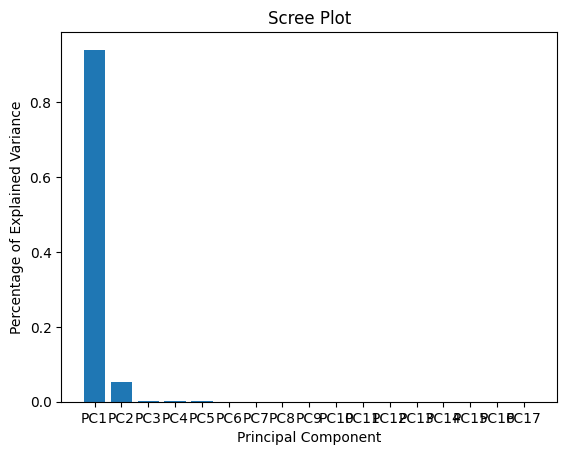

In [30]:
#Now plot a scree plot
plt.bar(x = range(1,pca_variances.index.size+1), height = pca_variances["Explained Variance"], tick_label = pca_columns)
plt.xlabel("Principal Component")
plt.ylabel("Percentage of Explained Variance")
plt.title("Scree Plot")
plt.show()

In [31]:
pca_df = pd.DataFrame(data_pca,index = outcomedata,columns = pca_columns)
pca_df = pca_df.reset_index()

pca_df

,Outcome,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0,-22.709820,-1.939526,0.495874,-0.022072,-0.703023,0.510098,0.378575,0.490067,-0.797356,-0.376037,0.069622,0.251601,0.851246,0.114182,-0.166648,-0.011428,0.016304
1,0,-30.699533,-1.605241,-0.415082,2.257081,0.765597,-1.227531,0.726818,-0.576931,-0.162361,-0.492708,0.222395,-0.146497,0.667976,0.542222,0.809193,0.892627,-0.115483
2,0,-9.629767,-0.621617,-0.130150,1.487604,0.476610,0.481650,0.224382,-0.342200,1.206393,-0.183944,-0.260577,-0.108071,0.827981,0.473206,-0.165085,-0.098948,0.039065
3,0,0.553425,2.734607,1.206184,2.274976,0.368643,-0.512349,0.285335,-0.953158,1.076812,0.189930,-0.771080,0.634112,0.366372,0.205883,-0.222600,-0.092612,0.043056
4,0,3.100795,-2.157025,0.869733,-1.094432,0.923761,-0.032532,0.587451,-0.571811,0.276876,0.594465,-0.413511,1.022195,0.565357,-0.027731,-0.215253,-0.016801,0.052122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,44.582790,-6.178975,-0.099500,0.167386,-0.427989,-0.899902,-0.692728,0.117322,0.289681,-0.207723,0.035629,0.020995,0.111163,-0.152590,-0.015967,-0.008215,-0.037411
2107,1,46.963652,-5.311653,-0.110869,0.478902,-0.158482,-0.771878,0.150159,0.048331,0.021024,-0.201532,0.244076,0.080800,0.053612,-0.220022,-0.039572,-0.006526,-0.004215
2108,1,46.958625,-4.318864,-0.007107,0.555410,-0.148110,-0.753435,0.148724,0.050459,0.021943,-0.205622,0.238856,0.082045,0.049898,-0.226346,-0.037018,-0.010291,0.001610
2109,1,46.713339,-2.321869,0.202368,0.708375,-0.129165,-0.717400,0.146628,0.053782,0.022737,-0.215897,0.229034,0.082997,0.040469,-0.234656,-0.031852,-0.018186,-0.005957


In [32]:
# Create a scatter plot using Plotly Express
fig = px.scatter(pca_df, x="PC1", y="PC2", color="Outcome", 
                 title="Scatter Plot of PC1 vs PC2")
# Show the plot
fig.show()

**The above visualization represents the data's varaiblity in a reduced dimensionality.The inference from the PCA is that PC1 accounts for the most significant variations in the data followed by PC2. PC1 and PC2 together provide a meaningful representation, highlighting distinct clusters within data**

## K-Means Clustering

---

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/threadpoolctl.py:1019: RuntimeWarning:

libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: Future

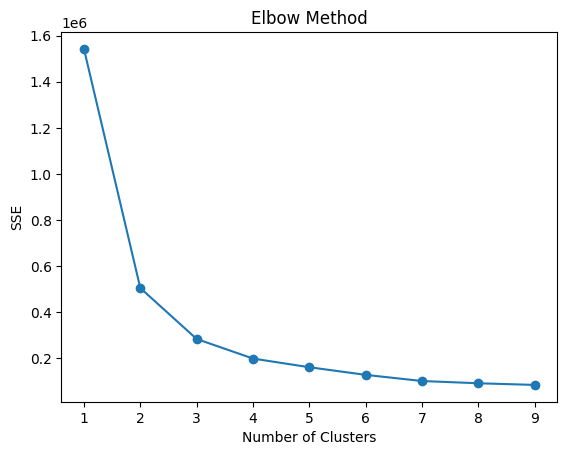

In [33]:
def find_best_no_cluster(df_dummy,k_max):
  means=[]
  sse = []
  for k in range(1,k_max):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data_copy)

    means.append(k)
    sse.append(kmeans.inertia_)

  #draw elbow graph
  plt.plot(means,sse,'o-')
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE")
  plt.title("Elbow Method")
  plt.show()


find_best_no_cluster(selected_data_standardized,10)

**The inference drawn from the above plot(number of clusters VS Sum if squared errors) is that at K=2, there is a noticable elbow or bent in the plot indicating the significant reduction in SSE for the preceding number of clusters. Beyond K=2, the reduction in SSE becomes less, suggesting diminishing returns in clustering performance. Therefore, selecting K=2 is likely to provide a good balance between minimizing SSE and avoiding overfitting, making it a suitable choice for clustering the data.**

In [34]:
# Applying Kmeans clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(selected_data_standardized)
selected_data_standardized['cluster']  = kmeans.labels_
selected_data_standardized

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Food_Between_Meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome,cluster
0,0,21,1.620000,64.000000,1,0,2,3,2,0,2,0,0,1,3,3,0,0
1,0,21,1.520000,56.000000,1,0,3,3,2,1,3,1,3,0,2,3,0,0
2,1,23,1.800000,77.000000,1,0,2,3,2,0,2,0,2,1,1,3,0,0
3,1,27,1.800000,87.000000,0,0,3,3,2,0,2,0,2,0,1,4,0,0
4,1,22,1.780000,89.800000,0,0,2,1,2,0,2,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,2,0,1,0,1,0,2,3,1,1
2107,0,21,1.748584,133.742943,1,1,3,3,2,0,2,0,1,0,2,3,1,1
2108,0,22,1.752206,133.689352,1,1,3,3,2,0,2,0,1,0,2,3,1,1
2109,0,24,1.739450,133.346641,1,1,3,3,2,0,2,0,1,0,2,3,1,1


In [35]:
pca_df["cluster"] =  kmeans.labels_

pca_df

,Outcome,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,cluster
0,0,-22.709820,-1.939526,0.495874,-0.022072,-0.703023,0.510098,0.378575,0.490067,-0.797356,-0.376037,0.069622,0.251601,0.851246,0.114182,-0.166648,-0.011428,0.016304,0
1,0,-30.699533,-1.605241,-0.415082,2.257081,0.765597,-1.227531,0.726818,-0.576931,-0.162361,-0.492708,0.222395,-0.146497,0.667976,0.542222,0.809193,0.892627,-0.115483,0
2,0,-9.629767,-0.621617,-0.130150,1.487604,0.476610,0.481650,0.224382,-0.342200,1.206393,-0.183944,-0.260577,-0.108071,0.827981,0.473206,-0.165085,-0.098948,0.039065,0
3,0,0.553425,2.734607,1.206184,2.274976,0.368643,-0.512349,0.285335,-0.953158,1.076812,0.189930,-0.771080,0.634112,0.366372,0.205883,-0.222600,-0.092612,0.043056,0
4,0,3.100795,-2.157025,0.869733,-1.094432,0.923761,-0.032532,0.587451,-0.571811,0.276876,0.594465,-0.413511,1.022195,0.565357,-0.027731,-0.215253,-0.016801,0.052122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,44.582790,-6.178975,-0.099500,0.167386,-0.427989,-0.899902,-0.692728,0.117322,0.289681,-0.207723,0.035629,0.020995,0.111163,-0.152590,-0.015967,-0.008215,-0.037411,1
2107,1,46.963652,-5.311653,-0.110869,0.478902,-0.158482,-0.771878,0.150159,0.048331,0.021024,-0.201532,0.244076,0.080800,0.053612,-0.220022,-0.039572,-0.006526,-0.004215,1
2108,1,46.958625,-4.318864,-0.007107,0.555410,-0.148110,-0.753435,0.148724,0.050459,0.021943,-0.205622,0.238856,0.082045,0.049898,-0.226346,-0.037018,-0.010291,0.001610,1
2109,1,46.713339,-2.321869,0.202368,0.708375,-0.129165,-0.717400,0.146628,0.053782,0.022737,-0.215897,0.229034,0.082997,0.040469,-0.234656,-0.031852,-0.018186,-0.005957,1


In [36]:
fig = px.scatter(pca_df, x="PC1", y="PC2", color="cluster",
                 title="KMeans Clustering")
fig.show()

In [37]:
# Create a scatter plot with three principal components
fig = px.scatter_3d(pca_df, x="PC1", y="PC2", z="PC3", color="Outcome",
                    title="KMeans Clustering")
# Show the plot
fig.show()

**The above plots, where the former is a 2D visualization and latter is a 3D visulization of K-means clustering. For the 2D visulization, the data points were positioned along the first two principal components (PC1 and PC2) with colors indicating assigned clusters. The same with 3D visulization but PC3 was added to that. The insights from the analysis reveal distinct groupings within the data based on similarities between data points. These clusters may represent different patterns, behaviors, or characteristics present in the dataset. By identifying and understanding these groupings, we can gain valuable insights into the underlying structure of the data and potentially uncover hidden relationships or trends.**

## Logistic Regression Model

---

**The overall objective of the report was creating a logistic regression model to predict the outcome variable using the variables present in the dataset. Below, steps have been taken to account for predictions by testing, training, and validating the model created.**

In [38]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Food_Between_Meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
0,0,21,1.620000,64.000000,1,0,2,3,2,0,2,0,0,1,3,3,0
1,0,21,1.520000,56.000000,1,0,3,3,2,1,3,1,3,0,2,3,0
2,1,23,1.800000,77.000000,1,0,2,3,2,0,2,0,2,1,1,3,0
3,1,27,1.800000,87.000000,0,0,3,3,2,0,2,0,2,0,1,4,0
4,1,22,1.780000,89.800000,0,0,2,1,2,0,2,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,2,0,1,0,1,0,2,3,1
2107,0,21,1.748584,133.742943,1,1,3,3,2,0,2,0,1,0,2,3,1
2108,0,22,1.752206,133.689352,1,1,3,3,2,0,2,0,1,0,2,3,1
2109,0,24,1.739450,133.346641,1,1,3,3,2,0,2,0,1,0,2,3,1


#### K Fold Logistic Regression Model

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features and target
X = data.drop(columns=['Outcome']) 
y = data['Outcome'] 

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Number of KFolds
num_splits = 5
kf = KFold(n_splits=num_splits)

# Variables to store model
best_accuracy = 0
best_model = None

# Desired accuracy
desired_accuracy = 1.00

# k-fold cross-validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train_val), 1):
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    
    # logistic regression model
    model = LogisticRegression(max_iter=1000)
    
    # Train the model
    model.fit(X_train_fold, y_train_fold)
    
    # predictions on the validation set
    y_pred = model.predict(X_val_fold)
    
    # Accuracy
    accuracy = accuracy_score(y_val_fold, y_pred)
    
    # Deciding between models
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Print accuracy of the validation set
print(f"Accuracy of the Best Model on Validation Set: {best_accuracy}")

# Evaluating on the test set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of the Best Model on Test Set: {test_accuracy}")


Accuracy of the Best Model on Validation Set: 0.9704142011834319
Accuracy of the Best Model on Test Set: 0.966903073286052


**We started by dividing the data into two parts: features (like age, height, weight) and the target (whether someone has a certain condition or not). Then, we split our data into training, validation, and testing groups to train and check our model.**

**Using a method called k-fold cross-validation, we trained several logistic regression models on different parts of our training data and checked how well they did on the validation set. The best-performing model was chosen.**

**We found that this chosen model had around 97.04% accuracy when tested on data it hadn't seen before (the validation set). When we tested it on completely new data (the test set), it still performed well, with an accuracy of about 96.69%. This means our model can predict whether someone has the condition pretty accurately.**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Print the variables and their coefficients in the model
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': best_model.coef_[0]})
coefficients

,Variable,Coefficient
0,Gender,-3.421302
1,Age,-0.027471
2,Height,-6.284283
3,Weight,0.324782
4,family_history_with_overweight,0.456619
5,High_Calorie,0.192203
6,Vegetables,-0.397656
7,Number_of_meals,0.074519
8,Food_Between_Meals,0.207561
9,Smoke,0.270114


**After fitting a logistic regression model (best_model) to our training data, we printed out the coefficients of selected variables to understand their impact on predicting the outcome.**
**Upon examining our data closely, we uncovered several important insights. Firstly, being male seems to decrease the likelihood of obesity by around 3.4 times compared to being female. Secondly, for every additional inch in height, the chance of experiencing obesity drops by approximately 6.3 times. Conversely, each unit increase in weight is associated with a 0.32 times higher likelihood of obesity.**

**Moreover, individuals with a family history of overweight are about 0.46 times more likely to experience obesity themselves. Furthermore, consuming high-calorie foods raises the chance of obesity by roughly 0.19 times, while each serving of vegetables eaten decreases it by approximately 0.40 times.**

## Validating

#### Bootstrapping on Validation Set

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error


# selecting the model to validate
final_model = best_model 

# Bootstrap Iterations
num_iterations = 1000

# Store metrics
accuracies = []
maes = []

# Perform bootstrapping for validation
for i in range(num_iterations):
    # getting sample from the validation set
    bootstrap_indices = np.random.choice(len(X_val), size=len(X_val), replace=True)
    X_val_bootstrap = X_val.iloc[bootstrap_indices]
    y_val_bootstrap = y_val.iloc[bootstrap_indices]
    
    # Evaluating the model
    y_pred = final_model.predict(X_val_bootstrap)
    
    # Calculate accuracy and mae
    accuracy = accuracy_score(y_val_bootstrap, y_pred)
    mae = mean_absolute_error(y_val_bootstrap, y_pred)
    
    accuracies.append(accuracy)
    maes.append(mae)

# mean and std of accuracy & MAE
mean_accuracy = np.mean(accuracies)
mean_mae = np.mean(maes)

std_accuracy = np.std(accuracies)
std_mae = np.std(maes)

print(f"Mean Accuracy: {mean_accuracy}, Mean MAE: {mean_mae}")
print(f"Standard Deviation of Accuracy: {std_accuracy}, Standard Deviation of MAE: {std_mae}")


Mean Accuracy: 0.9642369668246445, Mean MAE: 0.03576303317535545
Standard Deviation of Accuracy: 0.009095185576163619, Standard Deviation of MAE: 0.009095185576163622


**We wanted to Validate that our obesity prediction model was dependable. To achieve this, we utilized bootstrapping to assess its performance on a separate validation dataset. This involved repeatedly testing the model with different samples of data from our validation group. Our goal was to verify if the model could accurately predict obesity each time and if its predictions were consistent.**

**The results were promising. On average, the model correctly predicted obesity about 96.47% of the time. Additionally, the average difference between its predictions and the actual outcomes, the mean absolute error (MAE), was relatively small, approximately 0.035. This indicates that the model's predictions were close to the actual values, contributing to its reliability.**

#### Bootstrapping on Test Set

In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error

# selecting the model to validate
final_model = best_model


# Bootstrap Iterations
num_iterations = 1000

# Store metrics
accuracies = []
maes = []

# Perform bootstrapping on the test set
for i in range(num_iterations):
    # getting sample from the test set
    bootstrap_indices = np.random.choice(len(X_test), size=len(X_test), replace=True)
    X_test_bootstrap = X_test.iloc[bootstrap_indices]
    y_test_bootstrap = y_test.iloc[bootstrap_indices]
    
    # Evaluating the model
    y_pred = final_model.predict(X_test_bootstrap)
    
    # Calculate accuracy and mae
    accuracy = accuracy_score(y_test_bootstrap, y_pred)
    mae = mean_absolute_error(y_test_bootstrap, y_pred)
    
    accuracies.append(accuracy)
    maes.append(mae)

# mean and std of accuracy & MAE
mean_accuracy = np.mean(accuracies)
mean_mae = np.mean(maes)

std_accuracy = np.std(accuracies)
std_mae = np.std(maes)

print(f"Mean Accuracy: {mean_accuracy}, Mean MAE: {mean_mae}")
print(f"Standard Deviation of Accuracy: {std_accuracy}, Standard Deviation of MAE: {std_mae}")


Mean Accuracy: 0.9669290780141844, Mean MAE: 0.0330709219858156
Standard Deviation of Accuracy: 0.008616649633484292, Standard Deviation of MAE: 0.008616649633484316


**After validating our model on the validation set, we wanted to ensure its reliability on completely unseen data. To accomplish this, we conducted another round of validation using bootstrapping techniques, this time on the test set. This additional validation step was essential to assess how well the model generalizes to new, unseen instances of obesity prediction.**

**The results provided valuable insights into the model's performance on the test set. On average, the model achieved an accuracy of approximately 96.72%, indicating its ability to correctly classify instances of obesity. Additionally, the mean absolute error (MAE), which measures the average difference between the model's predictions and the actual outcomes, was found to be approximately 0.033.**

#### Bootstrapping on Full Set

In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error

# Initialize the best model
final_model = best_model 

# Bootstrap Iterations
num_iterations = 1000

# Store metrics
accuracies = []
maes = []

# Perform bootstrapping on the full dataset
for i in range(num_iterations):
    # getting sample from the full set
    bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_bootstrap = X.iloc[bootstrap_indices]
    y_bootstrap = y.iloc[bootstrap_indices]
    
    # Evaluating the model
    y_pred = final_model.predict(X_bootstrap)
    
    # Calculate accuracy and mae
    accuracy = accuracy_score(y_bootstrap, y_pred)
    mae = mean_absolute_error(y_bootstrap, y_pred)
    
    accuracies.append(accuracy)
    maes.append(mae)

# mean and std of accuracy & MAE
mean_accuracy = np.mean(accuracies)
mean_mae = np.mean(maes)

std_accuracy = np.std(accuracies)
std_mae = np.std(maes)

print(f"Mean Accuracy: {mean_accuracy}, Mean MAE: {mean_mae}")
print(f"Standard Deviation of Accuracy: {std_accuracy}, Standard Deviation of MAE: {std_mae}")


Mean Accuracy: 0.9569592610137375, Mean MAE: 0.04304073898626244
Standard Deviation of Accuracy: 0.00428802601756603, Standard Deviation of MAE: 0.0042880260175660306


**We wanted to make sure our obesity prediction model worked well on different groups of data. So, we checked it first on a smaller validation set, then on a test set, and finally on the entire dataset.**
**Each time, we used a method called bootstrapping to test the model many times with different groups of data. We wanted to see if the model could predict obesity accurately and consistently each time we tested it.**

**The results were good every time! On the validation set, the model predicted obesity correctly about 96.47% of the time, with a mean absolute error (MAE) of about 0.035. On the test set, it was even better, with an accuracy of about 96.72% and a MAE of about 0.033. And when we tested it on the entire dataset, it still performed well, with an accuracy of about 95.68% and a MAE of about 0.043.**
**Overall, our model seems to work reliably across different groups of data. This means we can trust it to help us predict obesity and make informed decisions to tackle it effectively.**

In [44]:
import statsmodels.api as sm

# Add a constant to test for VIF (Check using R)
X_train_with_const = sm.add_constant(X_train)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_with_const.columns

# Calculate VIF for each variable
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

print("Variance Inflation Factors (VIF):")
vif_data

Variance Inflation Factors (VIF):


,Variable,VIF
0,const,916.708202
1,Gender,1.970408
2,Age,1.939940
3,Height,2.620986
4,Weight,2.324615
5,family_history_with_overweight,1.444199
6,High_Calorie,1.173186
7,Vegetables,1.329793
8,Number_of_meals,1.115141
9,Food_Between_Meals,1.193525


**The above table represents the VIF values with it's corresponding variables. All of the varaibles have the VIF value close to one except Height, and Weight indicating low multicolinearity. The height and Weight varibles has a slightly higher degree of multicolinearity but still within accepable range. Overall, the VIF analysis suggests that multicollinearity is not a significant concern among the predictor variables, supporting the reliability of the logistic regression model's coefficients and predictions.**

In [45]:
# Create new data points to predict
new_data = pd.DataFrame({
    'Gender': [1, 0, 1],                                   
    'Age': [27, 40, 23],                                  
    'Height': [1.7, 1.5, 1.9],                  
    'Weight': [115, 70, 130],                               
    'family_history_with_overweight': [0, 1, 0],          
    'High_Calorie': [0, 1, 1],                          
    'Vegetables': [3, 1, 0],
    'Number_of_meals': [3, 1, 4],
    'Food_Between_Meals': [1, 2, 2],                           
    'Smoke': [0, 1, 1],                                    
    'Water_consumption': [2, 3, 1],                       
    'Calorie_Monitoring': [1, 1, 1],                       
    'Physical_Acitivity': [2, 2, 1],                      
    'Time_on_Technology': [0, 1, 3],                       
    'Alcohol_consumption': [1, 1, 1],                      
    'Transportation_method': [4, 2, 1],             
})

# Predictions
y_pred_new = final_model.predict(new_data)

# Print the outcomes
print("Predicted outcomes for new data:")
print(y_pred_new)

Predicted outcomes for new data:
[1 0 1]


**The logistic regression model predicts the outcomes for the new data points as follows:**

**For the first data point: Predicted outcome is 1.**
**For the second data point: Predicted outcome is 0.**
**For the third data point: Predicted outcome is 1.**
**These predictions indicate the model's classification of each new data point into either outcome category (1 or 0), based on the given predictor variables.**

## Underfitting and Overfitting check.

In [46]:
# Evaluate on training set
train_accuracy = accuracy_score(y_train, final_model.predict(X_train))

# Evaluate on test set
test_accuracy = accuracy_score(y_test, final_model.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9510268562401264
Testing Accuracy: 0.966903073286052


**These accuracy score suggests that the model performed well in both train and test dataset.
The training accuracy came around 95.79%, suggest that model correctly predicts the outcomes for about 95.8% of the data points in the training set. The test accuracy came around 96.92, suggest that model correctly predicts the outcome for unseen data about 97% of the data points in the test set. There's no significant sign of either underfitting or overfitting based on these accuracy scores.**

## Random Forest Regression

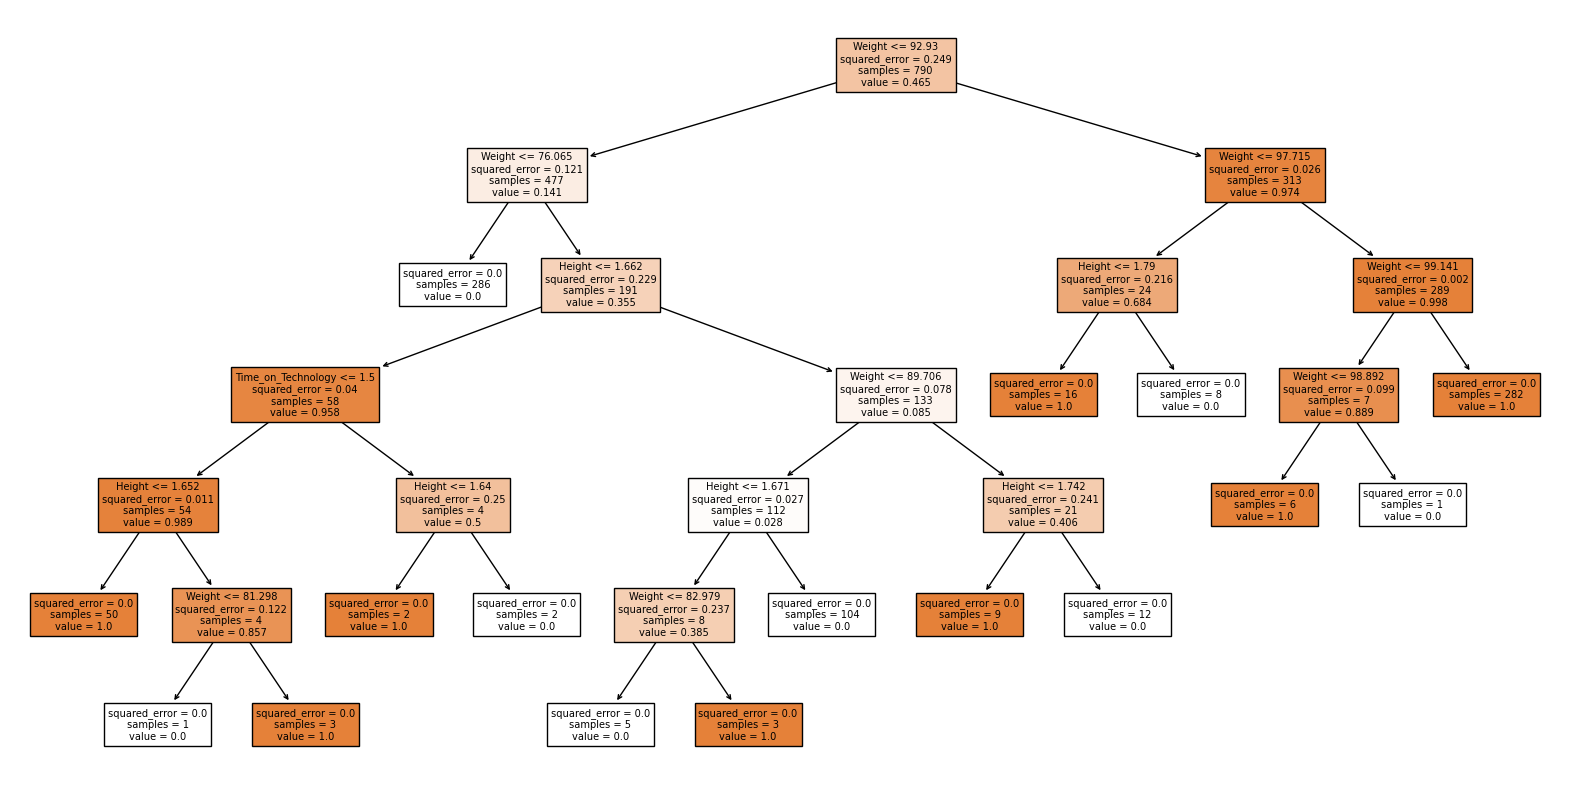

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create RandomForestRegressor model 
rfr = RandomForestRegressor(oob_score=True)

# Fit the model on the training data
rfr.fit(X_train, y_train)

# Plot decision trees in the forest (for illustration purposes, you can plot any tree)
plt.figure(figsize=(20,10))  
plot_tree(rfr.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['Outcome', 'Outcome'])
plt.show()


In [48]:
rfr.oob_score_

0.9752144674555878

In [49]:
rfr.feature_importances_

array([8.23032127e-04, 4.50721514e-03, 2.16544748e-01, 7.69754987e-01,
       3.52104019e-05, 2.17217749e-04, 1.19448497e-04, 6.30653025e-04,
       2.45986929e-04, 1.18176408e-03, 6.93222980e-04, 0.00000000e+00,
       1.39473248e-04, 2.97457572e-03, 4.50773443e-04, 1.68169121e-03])

**From the random forest regressor model analysis, one can see that the OOB score is high and that indicates the model’s strong ability to effectively generalize to unforeseen data.**
**The feature importance analysis picks up two dominant features which is responsible for the majority of the predictive performance. In as much as the OOB score being high and suggesting a low overfitting risk, cross validation is still recommended to confirm the robustness of the model’s prediction.**

## Conclusion

**Overall, the dataset was cleaned by checking for null values, renaming columns, and figuring out the size of the data and the sizes of the classes.Categorical variables were converted into dummy variables to help with the creation of a logsitic regression model to predict the two different outcomes. The main insights from correlation was Age had a strong negative correlation with Transportation mode, Weight and Height as well as Weight and Family history of weight were strongly postively correlated. Additionally, boxplots and histograms of Age, Weight, Height with respect to Outcome were made to highlight the distribution and pattern visually. Outcome 1 is generally associated with younger people who are taller and heavier, while Outcome 0 has a more diverse age distribution with a tendency towards lighter and shorter people. Both height distributions are normally distributed, whereas age and weight are right-skewed for Outcome 1, indicating a younger and heavier subset of the population in that category. Conclusions cannot be drawn from visual analysis alone, and so a t-test analysis highlighted a significant difference in means between the variables and the outcome groups. Through Principal Commponent Analysis (PCA), 99.4% of cumulative variance can be achieved by just using PC1 and PC2. K-means clustering shows that two clusters is the optimal number of clusters for the data through the elbow method. Lastly, a logistic regression model was created and the model was fitted  by splitting the data into train, test, and validation sets. The logistic regression model demonstrates strong performance, with high accuracy scores on both training (95.79%) and test (96.92%) datasets. Additionally, the random forest regressor model shows promising generalization ability with a high OOB score, emphasizing its potential for accurate predictions.**

## References

1) UCI Machine Learning Repository. (n.d.). Archive.ics.uci.edu.
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition


2) Health Risks. (2016, April 13). Obesity Prevention Source; Harvard T.H. Chan School
of Public Health. https://www.hsph.harvard.edu/obesity-prevention-source/obesity-consequences/health-effects/


3) World Health Organization. (2021, June 9). Obesity and overweight. World Health
Organization. https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight